<a href="https://colab.research.google.com/github/DicheDiez10/CSCI-191-T-ML/blob/main/KaggleMNIST/KaggleMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [ ]:
#Importing the data: train, test, samplesubmission
train_df = pd.read_csv('https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleMNIST/MNIST_Train.csv')
test_df = pd.read_csv('https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleMNIST/MNIST_Test.csv')
ss_df = pd.read_csv('https://github.com/DicheDiez10/CSCI-191-T-ML/raw/main/KaggleMNIST/MNIST_Sample_Submission.csv')

In [ ]:
#Visualizing the data we pulled (TRAINING)
print("Training Data Set Shape : ",train_df.values.shape, "\n")
print(train_df.values[1,1:])

Training Data Set Shape :  (42000, 785) 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  30 137 137
 192  86  72   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  16 179 254 254 254
 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254
 104   0   0   0   0   0   0   0   0   0   0   0   0   0  61 191 254 254
 254 254 

Training Data  --▶  <font color = "gray"> 42,000 Rows, 785 Columns </font>

In [ ]:
#Visualizing the data we pulled (TESTING)
print("Testing Data Set Shape : ",test_df.values.shape, "\n")
print(test_df.values[1,1:])

Testing Data Set Shape :  (28000, 784) 

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29  85
  85  85  85  85  85  85  85  71   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 107 128 168 250 250 250 252 250 250 250 250 231
 127  63   0   0   0   0   0   0   0   0   0   0   0   0  85 168 237 252
 250 250 2

Testing Data  --▶  <font color = "gray"> 28,000 Rows, 784 Columns (Missing the label column) </font>

In [ ]:
#Visualizing the data we pulled (SAMPLE SUBMISSION)
print("Testing Data Set Shape : ",ss_df.values.shape, "\n")

#should be 28,000 rows as that is how many rows we see in the test set
#should be two columns, ImageId and Label

Testing Data Set Shape :  (28000, 2) 



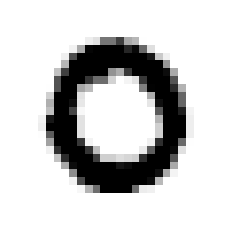

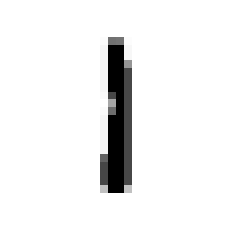

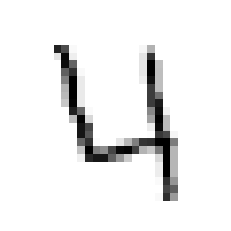

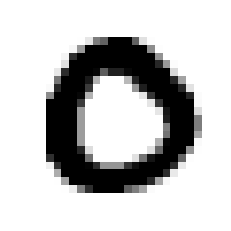

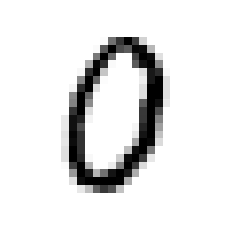

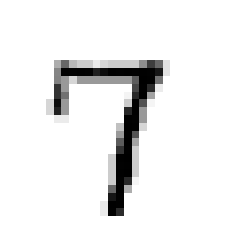

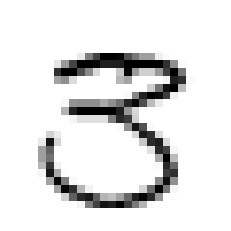

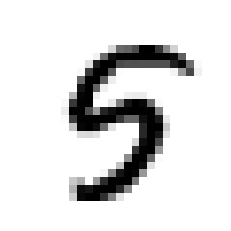

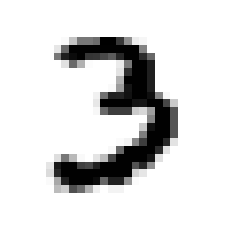

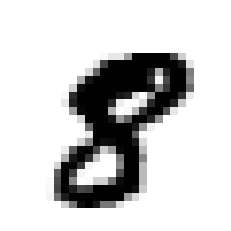

In [ ]:
#Representing the first 10 rows in the training data set to 
#visualize the numbers and types of numbers we are working with
for row in range(1,11):

  #row number 'row' and 'everything after the label' columns
  myNumber = train_df.values[row,1:]

  #28x28 pixel grid
  myNumber=myNumber.reshape((28,28))
  plt.imshow(myNumber, cmap = plt.cm.binary,interpolation="nearest")
  plt.axis("off")
  plt.show()

Distribution Counts by Label Number in Training Set:




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


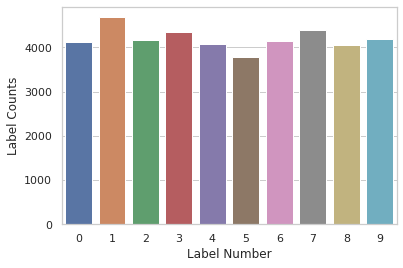

In [ ]:
#histogram showing distribution of the labels we have in the training set
print("Distribution Counts by Label Number in Training Set:\n\n")

sns.set_theme(style="whitegrid")
sns.barplot(train_df['label'].value_counts().index , train_df['label'].value_counts())
plt.ylabel('Label Counts')
plt.xlabel('Label Number')
plt.show()

In [ ]:
#rnd_pca = PCA(n_components=154)
#rnd_pca = PCA(n_components=169)

#Set multiple n_components for testing
rnd_pca1 = PCA(n_components=1)
rnd_pca2 = PCA(n_components=2)
rnd_pca3 = PCA(n_components=3)
rnd_pca4 = PCA(n_components=4)
rnd_pca5 = PCA(n_components=5)
rnd_pca10 = PCA(n_components=10)
rnd_pca25 = PCA(n_components=25)
rnd_pca50 = PCA(n_components=50)
rnd_pca75 = PCA(n_components=75)
rnd_pca100 = PCA(n_components=100)
rnd_pca150 = PCA(n_components=150)
rnd_pca200 = PCA(n_components=200)

rnd_pca1.fit(train_df.values[:,1:])
rnd_pca2.fit(train_df.values[:,1:])
rnd_pca3.fit(train_df.values[:,1:])
rnd_pca4.fit(train_df.values[:,1:])
rnd_pca5.fit(train_df.values[:,1:])
rnd_pca10.fit(train_df.values[:,1:])
rnd_pca25.fit(train_df.values[:,1:])
rnd_pca50.fit(train_df.values[:,1:])
rnd_pca75.fit(train_df.values[:,1:])
rnd_pca100.fit(train_df.values[:,1:])
rnd_pca150.fit(train_df.values[:,1:])
rnd_pca200.fit(train_df.values[:,1:])

X_reduced1 = rnd_pca1.transform(train_df.values[:,1:])
X_reduced2 = rnd_pca2.transform(train_df.values[:,1:])
X_reduced3 = rnd_pca3.transform(train_df.values[:,1:])
X_reduced4 = rnd_pca4.transform(train_df.values[:,1:])
X_reduced5 = rnd_pca5.transform(train_df.values[:,1:])
X_reduced10 = rnd_pca10.transform(train_df.values[:,1:])
X_reduced25 = rnd_pca25.transform(train_df.values[:,1:])
X_reduced50 = rnd_pca50.transform(train_df.values[:,1:])
X_reduced75 = rnd_pca75.transform(train_df.values[:,1:])
X_reduced100 = rnd_pca100.transform(train_df.values[:,1:])
X_reduced150 = rnd_pca150.transform(train_df.values[:,1:])
X_reduced200 = rnd_pca200.transform(train_df.values[:,1:])

print (X_reduced1.shape)
print (X_reduced2.shape)
print (X_reduced3.shape)
print (X_reduced4.shape)
print (X_reduced5.shape)
print (X_reduced10.shape)
print (X_reduced25.shape)
print (X_reduced50.shape)
print (X_reduced75.shape)
print (X_reduced100.shape)
print (X_reduced150.shape)
print (X_reduced200.shape)

(42000, 1)
(42000, 2)
(42000, 3)
(42000, 4)
(42000, 5)
(42000, 10)
(42000, 25)
(42000, 50)
(42000, 75)
(42000, 100)
(42000, 150)
(42000, 200)


28


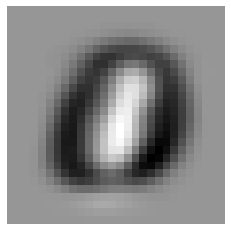

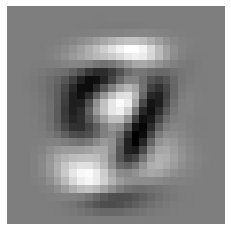

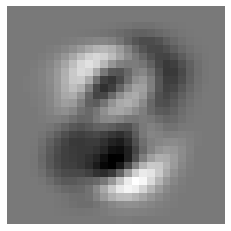

In [ ]:
#eigennumbers = rnd_pca.components_.reshape((154,28,28))
#eigennumbers = rnd_pca.components_.reshape((169,28,28))

#All would look the same so we just output with components = 4 to show what the numbers look like
eigennumbers = rnd_pca4.components_.reshape((4,28,28))
myNumber = eigennumbers[0]
print (len(myNumber))
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

myNumber = eigennumbers[1]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

myNumber = eigennumbers[2]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
clf1 = LogisticRegression(solver='saga', max_iter=10000)
clf2 = LogisticRegression(solver='saga', max_iter=10000)
clf3 = LogisticRegression(solver='saga', max_iter=10000)
clf4 = LogisticRegression(solver='saga', max_iter=10000)
clf5 = LogisticRegression(solver='saga', max_iter=10000)
clf10 = LogisticRegression(solver='saga', max_iter=10000)
clf25 = LogisticRegression(solver='saga', max_iter=10000)
clf50 = LogisticRegression(solver='saga', max_iter=10000)
clf75 = LogisticRegression(solver='saga', max_iter=10000)
clf100 = LogisticRegression(solver='saga', max_iter=10000)
clf150 = LogisticRegression(solver='saga', max_iter=10000)
clf200 = LogisticRegression(solver='saga', max_iter=10000)

clf1.fit(X_reduced1, train_df.values[:, 0] )
clf2.fit(X_reduced2, train_df.values[:, 0] )
clf3.fit(X_reduced3, train_df.values[:, 0] )
clf4.fit(X_reduced4, train_df.values[:, 0] )
clf5.fit(X_reduced5, train_df.values[:, 0] )
clf10.fit(X_reduced10, train_df.values[:, 0] )
clf25.fit(X_reduced25, train_df.values[:, 0] )
clf50.fit(X_reduced50, train_df.values[:, 0] )
clf75.fit(X_reduced75, train_df.values[:, 0] )
clf100.fit(X_reduced100, train_df.values[:, 0] )
clf150.fit(X_reduced150, train_df.values[:, 0] )
clf200.fit(X_reduced200, train_df.values[:, 0] )

LogisticRegression(max_iter=10000, solver='saga')

In [ ]:
predict1 = clf1.predict(X_reduced1)
print("Accuracy 1 = ", accuracy_score(predict1, train_df.values[:, 0]))

predict2 = clf2.predict(X_reduced2)
print("Accuracy 2 = ", accuracy_score(predict2, train_df.values[:, 0]))

predict3 = clf3.predict(X_reduced3)
print("Accuracy 3 = ", accuracy_score(predict3, train_df.values[:, 0]))

predict4 = clf4.predict(X_reduced4)
print("Accuracy 4 = ", accuracy_score(predict4, train_df.values[:, 0]))

predict5 = clf5.predict(X_reduced5)
print("Accuracy 5 = ", accuracy_score(predict5, train_df.values[:, 0]))

predict10 = clf10.predict(X_reduced10)
print("Accuracy 10 = ", accuracy_score(predict10, train_df.values[:, 0]))

predict25 = clf25.predict(X_reduced25)
print("Accuracy 25 = ", accuracy_score(predict25, train_df.values[:, 0]))

predict50 = clf50.predict(X_reduced50)
print("Accuracy 50 = ", accuracy_score(predict50, train_df.values[:, 0]))

predict75 = clf75.predict(X_reduced75)
print("Accuracy 75 = ", accuracy_score(predict75, train_df.values[:, 0]))

predict100 = clf100.predict(X_reduced100)
print("Accuracy 100 = ", accuracy_score(predict100, train_df.values[:, 0]))

predict150 = clf150.predict(X_reduced150)
print("Accuracy 150 = ", accuracy_score(predict150, train_df.values[:, 0]))

predict200 = clf200.predict(X_reduced200)
print("Accuracy 200 = ", accuracy_score(predict200, train_df.values[:, 0]))


Accuracy 1 =  0.2884047619047619
Accuracy 2 =  0.41595238095238096
Accuracy 3 =  0.44066666666666665
Accuracy 4 =  0.5606904761904762
Accuracy 5 =  0.6553809523809524
Accuracy 10 =  0.7866428571428571
Accuracy 25 =  0.8765952380952381
Accuracy 50 =  0.9027857142857143
Accuracy 75 =  0.912952380952381
Accuracy 100 =  0.9176904761904762
Accuracy 150 =  0.9245952380952381
Accuracy 200 =  0.9279285714285714


In [ ]:
XTest_reduced1 = rnd_pca1.transform(test_df.values)
XTest_reduced2 = rnd_pca2.transform(test_df.values)
XTest_reduced3 = rnd_pca3.transform(test_df.values)
XTest_reduced4 = rnd_pca4.transform(test_df.values)
XTest_reduced5 = rnd_pca5.transform(test_df.values)
XTest_reduced10 = rnd_pca10.transform(test_df.values)
XTest_reduced25 = rnd_pca25.transform(test_df.values)
XTest_reduced50 = rnd_pca50.transform(test_df.values)
XTest_reduced75 = rnd_pca75.transform(test_df.values)
XTest_reduced100 = rnd_pca100.transform(test_df.values)
XTest_reduced150 = rnd_pca150.transform(test_df.values)
XTest_reduced200 = rnd_pca200.transform(test_df.values)
#print("Test Reduced Shape : ", (XTest_reduced.shape)

Test_predict1 = clf1.predict(XTest_reduced1)
Test_predict2 = clf2.predict(XTest_reduced2)
Test_predict3 = clf3.predict(XTest_reduced3)
Test_predict4 = clf4.predict(XTest_reduced4)
Test_predict5 = clf5.predict(XTest_reduced5)
Test_predict10 = clf10.predict(XTest_reduced10)
Test_predict25 = clf25.predict(XTest_reduced25)
Test_predict50 = clf50.predict(XTest_reduced50)
Test_predict75 = clf75.predict(XTest_reduced75)
Test_predict100 = clf100.predict(XTest_reduced100)
Test_predict150 = clf150.predict(XTest_reduced150)
Test_predict200 = clf200.predict(XTest_reduced200)

print("Predict Test 1 : ", Test_predict1)
print("Predict Test 2 : ", Test_predict2)
print("Predict Test 3 : ", Test_predict3)
print("Predict Test 4 : ", Test_predict4)
print("Predict Test 5 : ", Test_predict5)
print("Predict Test 10 : ", Test_predict10)
print("Predict Test 25 : ", Test_predict25)
print("Predict Test 50 : ", Test_predict50)
print("Predict Test 75 : ", Test_predict75)
print("Predict Test 100 : ", Test_predict100)
print("Predict Test 150 : ", Test_predict150)
print("Predict Test 200 : ", Test_predict200)

Predict Test 1 :  [0 0 1 ... 9 3 0]
Predict Test 2 :  [0 0 7 ... 3 7 0]
Predict Test 3 :  [0 0 7 ... 3 9 6]
Predict Test 4 :  [6 0 7 ... 3 7 6]
Predict Test 5 :  [6 0 7 ... 3 9 6]
Predict Test 10 :  [2 0 4 ... 3 9 2]
Predict Test 25 :  [2 0 9 ... 3 9 2]
Predict Test 50 :  [2 0 9 ... 3 9 2]
Predict Test 75 :  [2 0 9 ... 3 9 2]
Predict Test 100 :  [2 0 9 ... 3 9 2]
Predict Test 150 :  [2 0 9 ... 3 9 2]
Predict Test 200 :  [2 0 9 ... 3 9 2]


In [ ]:
#Changing the index column name
test_df.index.name='ImageId'
test_df.index+=1

In [ ]:
test_df['label']= Test_predict1
test_df['label'].to_csv('MNISTLogReg_components_1.csv', index=True, header=True)

test_df['label']= Test_predict2
test_df['label'].to_csv('MNISTLogReg_components_2.csv', index=True, header=True)

test_df['label']= Test_predict3
test_df['label'].to_csv('MNISTLogReg_components_3.csv', index=True, header=True)

test_df['label']= Test_predict4
test_df['label'].to_csv('MNISTLogReg_components_4.csv', index=True, header=True)

test_df['label']= Test_predict5
test_df['label'].to_csv('MNISTLogReg_components_5.csv', index=True, header=True)

test_df['label']= Test_predict10
test_df['label'].to_csv('MNISTLogReg_components_10.csv', index=True, header=True)

test_df['label']= Test_predict25
test_df['label'].to_csv('MNISTLogReg_components_25.csv', index=True, header=True)

test_df['label']= Test_predict50
test_df['label'].to_csv('MNISTLogReg_components_50.csv', index=True, header=True)

test_df['label']= Test_predict75
test_df['label'].to_csv('MNISTLogReg_components_75.csv', index=True, header=True)

test_df['label']= Test_predict100
test_df['label'].to_csv('MNISTLogReg_components_100.csv', index=True, header=True)

test_df['label']= Test_predict150
test_df['label'].to_csv('MNISTLogReg_components_150.csv', index=True, header=True)

test_df['label']= Test_predict200
test_df['label'].to_csv('MNISTLogReg_components_200.csv', index=True, header=True)

You can submit any of the Logistic Regression CSV files, but seeing that accuracy was most prevalent in 75+ components, we will try the last 4 and see the output results:

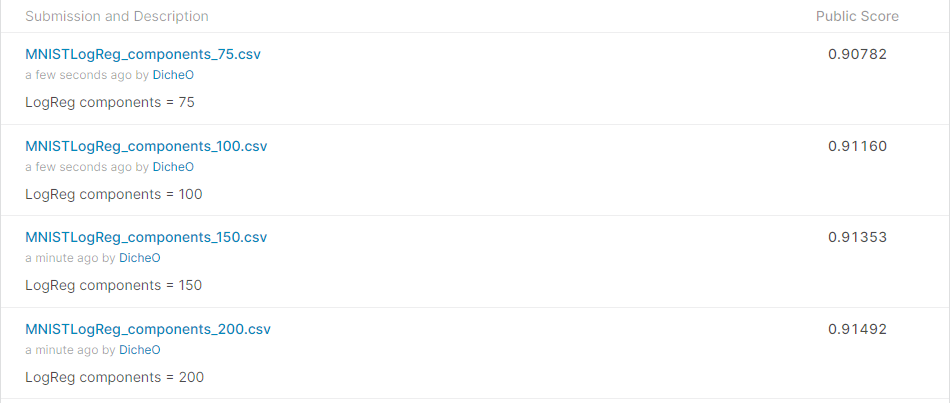

These results show that these four, although separated by 125 components (most - least) are around the ~ 90-92% accurate.

#Other Methods?

##Because we see that 100 and 200 seem to be a good spot for the number of components we will test those two with other different methods: K-Nearest-Neighbors, SVC, Perceptron modelling, MLP Classifcation (FIXXXXXXX)

In [1]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#components = 100 testing on
#using 4 as neighbors amount
KNN_100 = KNeighborsClassifier(n_neighbors = 4)
KNN_100.fit(X_reduced100, train_df.values[:, 0])
Pred_KNN_100 = KNN_100.predict(X_reduced100)

#replacing the label column with Pred_KNN_100
test_df['label']= Pred_KNN_100
test_df['label'].to_csv('MNISTKNN_components_100.csv', index=True, header=True)
#--------------------------------------------------------------------------------------
#components = 200 testing on
KNN_200 = KNeighborsClassifier(n_neighbors = 4)
KNN_200.fit(X_reduced200, train_df.values[:, 0])
Pred_KNN_200 = KNN_200.predict(X_reduced200)

#replacing the label column with Pred_KNN_200
test_df['label']= Pred_KNN_200
test_df['label'].to_csv('MNISTKNN_components_200.csv', index=True, header=True)

In [2]:
#SVC support vector machine
from sklearn.svm import SVC, LinearSVC

#components = 100 testing on
SVC_100 = SVC()
SVC_100.fit(X_reduced100, train_df.values[:, 0])
Pred_SVC_100 = SVC_100.predict(X_reduced100)

#replacing the label column with Pred_SVC_100
test_df['label']= Pred_SVC_100
test_df['label'].to_csv('MNISTSVC_components_100.csv', index=True, header=True)
#--------------------------------------------------------------------------------------
#components = 200 testing on
SVC_200 = SVC()
SVC_200.fit(X_reduced200, train_df.values[:, 0])
Pred_SVC_200 = SVC_200.predict(X_reduced200)

#replacing the label column with Pred_SVC_200
test_df['label']= Pred_SVC_200
test_df['label'].to_csv('MNISTSVC_components_200.csv', index=True, header=True)

In [3]:
#Perceptron
from sklearn.linear_model import Perceptron

#components = 100 testing on
Perceptron_100 = Perceptron()
Perceptron_100.fit(X_reduced100, train_df.values[:, 0])
Pred_Perceptron_100 = Perceptron_100.predict(X_reduced100)

#replacing the label column with Pred_Perceptron_100
test_df['label']= Pred_Perceptron_100
test_df['label'].to_csv('MNISTPerceptron_components_100.csv', index=True, header=True)
#--------------------------------------------------------------------------------------
#components = 200 testing on
Perceptron_200 = Perceptron()
Perceptron_200.fit(X_reduced200, train_df.values[:, 0])
Pred_Perceptron_200 = Perceptron_200.predict(X_reduced200)

#replacing the label column with Pred_Perceptron_200
test_df['label']= Pred_Perceptron_200
test_df['label'].to_csv('MNISTPerceptron_components_200.csv', index=True, header=True)

In [4]:
#MLP Classification
from sklearn.neural_network import MLPClassifier

#components = 100 testing on
MLP_100 = MLPClassifier()
MLP_100.fit(X_reduced100, train_df.values[:, 0])
Pred_MLP_100 = MLP_100.predict(X_reduced100)

#replacing the label column with Pred_MLP_100
test_df['label']= Pred_MLP_100
test_df['label'].to_csv('MNISTMLP_components_100.csv', index=True, header=True)
#--------------------------------------------------------------------------------------
#components = 200 testing on
MLP_200 = MLPClassifier()
MLP_200.fit(X_reduced200, train_df.values[:, 0])
Pred_MLP_200 = MLP_200.predict(X_reduced200)

#replacing the label column with Pred_MLP_200
test_df['label']= Pred_MLP_200
test_df['label'].to_csv('MNISTMLP_components_200.csv', index=True, header=True)